In [82]:
#Importando nossas bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **ESTATÍSTICAS DE JOGADORES DE BASQUETE**

In [83]:
#lendo o csv e guardando numa variável
dados = pd.read_csv('/content/players_stats_by_season_full_details.csv')

In [84]:
#vamos ver os 5 primeiros registros do arquivo
dados.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2019 - 2020,Regular_Season,James Harden,HOU,68,2482.6,672,1514,299,843,692,800,308,227,70,376,446,512,125,60,2335,1989.0,Aug,"Aug 26, 1989",06-May,196.0,220.0,100.0,United States,Artesia High School
1,NBA,2019 - 2020,Regular_Season,Damian Lillard,POR,66,2473.7,624,1349,270,674,460,518,194,114,33,251,284,530,70,22,1978,1990.0,Jul,"Jul 15, 1990",06-Mar,191.0,195.0,88.0,United States,Oakland High School
2,NBA,2019 - 2020,Regular_Season,Devin Booker,PHX,70,2511.8,627,1283,141,398,468,509,264,213,29,268,297,456,49,18,1863,1996.0,Oct,"Oct 30, 1996",06-Jun,198.0,206.0,93.0,United States,Moss Point High School
3,NBA,2019 - 2020,Regular_Season,Giannis Antetokounmpo,MIL,63,1916.9,685,1238,89,293,398,629,230,195,140,716,856,354,61,66,1857,1994.0,Dec,"Dec 6, 1994",06-Nov,211.0,242.0,110.0,Greece / Nigeria,NaN
4,NBA,2019 - 2020,Regular_Season,Trae Young,ATL,60,2120.1,546,1249,205,568,481,559,289,104,32,223,255,560,65,8,1778,1998.0,Sep,"Sep 19, 1998",06-Feb,188.0,180.0,82.0,United States,Norman High School


In [85]:
colunas = {'GP' : 'numero_jogos', #jogos que o jogador participou na temporada
'MIN': 'minutos_jogados',
'FGM': 'arremessos_convertidos',
'FGA': 'arremessos_tentados',
'3PM': 'bolas_de_3_convertidas',
'3PA': 'bolas_de_3_tentadas',
'FTM': 'lance_livre_convertido',
'FTA': 'lance_livre_tentados',
'TOV': 'turnover', #erros que causam a perda da bola para o time
'PF': 'faltas',
'ORB': 'rebotes_ofensivos',
'DRB' :'rebotes_defensivos',
'REB' : 'total_rebotes',
'AST' : 'assistencias',
'STL' : 'roubos_de_bola',
'BLK': 'bloqueios',
'PTS': 'pontos'}

In [86]:
#vendo quantas observações nós temos
dados.shape

(53798, 31)

In [87]:
#vendo quais as temporadas englobadas
dados['Season'].unique()

array(['2019 - 2020', '2018 - 2019', '2017 - 2018', '2016 - 2017',
       '2015 - 2016', '2014 - 2015', '2013 - 2014', '2012 - 2013',
       '2011 - 2012', '2010 - 2011', '2009 - 2010', '2008 - 2009',
       '2007 - 2008', '2006 - 2007', '2005 - 2006', '2004 - 2005',
       '2003 - 2004', '2002 - 2003', '2001 - 2002', '2000 - 2001',
       '1999 - 2000'], dtype=object)

In [88]:
#tipos de liga
dados['League'].unique()

array(['NBA', 'Euroleague', 'Israeli-BSL', 'Argentinian-Liga-A',
       'Australian-NBL', 'Austrian-A-Bundesliga', 'Balkan-BIL',
       'Belarusian-BPL', 'Belgium-Scooore-League', 'Bosnian-BiH-Liga',
       'Brazilian-NBB', 'British-BBL', 'Bulgarian-NBL', 'Canadian-NBL',
       'Chinese-CBA', 'Croatian-A-1-Liga', 'Czech-NBL',
       'Danish-Basketligaen', 'Estonian-Latvian-Basketball-League',
       'Eurocup', 'FIBA-Europe-Cup', 'Finnish-Korisliiga',
       'French-Jeep-Elite', 'Georgian-Super-Liga', 'German-BBL',
       'Greek-HEBA-A1', 'Hungarian-NBIA', 'Italian-Lega-Basket-Serie-A',
       'Japanese-BLeague', 'Kosovo-FBK', 'Lebanese-Division-A',
       'Lithuanian-LKL', 'Luxembourg-Total-League',
       'Macedonian-Superleague', 'Mexican-LNBP', 'Netherlands-DBL',
       'New-Zealand-NBL', 'Norwegian-BLNO', 'Polish-TBL',
       'Romanian-Divizia-A', 'Serbian-KLS', 'Slovakian-Extraliga',
       'Slovenian-SKL', 'South-Korean-KBL', 'Spanish-ACB',
       'Swedish-Basketligan', 'Swiss-LN

In [89]:
#tipo de temporada
dados['Stage'].unique()

array(['Regular_Season', 'International', 'Playoffs'], dtype=object)

In [90]:
#resumo do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53798 entries, 0 to 53797
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       53798 non-null  object 
 1   Season       53798 non-null  object 
 2   Stage        53798 non-null  object 
 3   Player       53798 non-null  object 
 4   Team         53787 non-null  object 
 5   GP           53798 non-null  int64  
 6   MIN          53798 non-null  float64
 7   FGM          53798 non-null  int64  
 8   FGA          53798 non-null  int64  
 9   3PM          53798 non-null  int64  
 10  3PA          53798 non-null  int64  
 11  FTM          53798 non-null  int64  
 12  FTA          53798 non-null  int64  
 13  TOV          53798 non-null  int64  
 14  PF           53798 non-null  int64  
 15  ORB          53798 non-null  int64  
 16  DRB          53798 non-null  int64  
 17  REB          53798 non-null  int64  
 18  AST          53798 non-null  int64  
 19  STL 

In [91]:
#criando uma coluna de idade
dados['age_2020'] = 2020 - dados['birth_year']

In [92]:
#usando o str split para separar as temporadas
dados[['season_start', 'season_end']] = dados['Season'].str.split(' - ',expand=True).astype(int)

In [93]:
#criando uma coluna para a idade durante a temporada
dados['age_season_start'] = dados['season_start'] - dados['birth_year']

In [108]:
#visualizando as colunas criadas
dados.head(2)

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,age_2020,season_start,season_end,age_season_start
0,NBA,2019 - 2020,Regular_Season,James Harden,HOU,68,2482.6,672,1514,299,843,692,800,308,227,70,376,446,512,125,60,2335,1989.0,Aug,"Aug 26, 1989",06-May,196.0,220.0,100.0,United States,Artesia High School,31.0,2019,2020,30.0
1,NBA,2019 - 2020,Regular_Season,Damian Lillard,POR,66,2473.7,624,1349,270,674,460,518,194,114,33,251,284,530,70,22,1978,1990.0,Jul,"Jul 15, 1990",06-Mar,191.0,195.0,88.0,United States,Oakland High School,30.0,2019,2020,29.0


In [94]:
#criando um subset só com os jogadores da NBA
#com query = dados.query('League == "NBA"')
nba = dados[dados['League'] == 'NBA']

In [95]:
#estatísticas descritivas
nba[['GP', 'MIN']].describe()

,GP,MIN
count,7490.000000,7490.000000
mean,49.384913,1314.630013
std,31.474893,964.844408
min,1.000000,0.700000
25%,12.000000,277.200000
50%,66.000000,1344.250000
75%,77.000000,2133.325000
max,85.000000,3485.000000


In [96]:
#moda de jogos
nba['GP'].mode()

0    82
dtype: int64

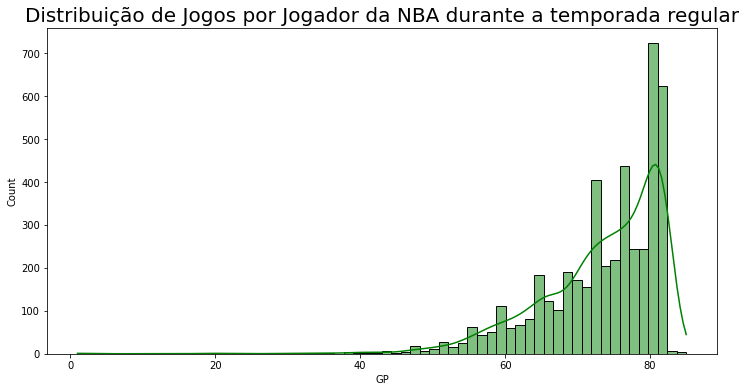

In [134]:
#distribuição dos jogos por jogador
plt.figure(figsize=(12,6))
sns.histplot(x=nba[nba['Stage'] =='Regular_Season' ]['GP'], kde=True, color='g')
plt.title('Distribuição de Jogos por Jogador da NBA durante a temporada regular', fontsize=20)
ax.set_xlabel('Games Played', fontsize=16)
plt.show()

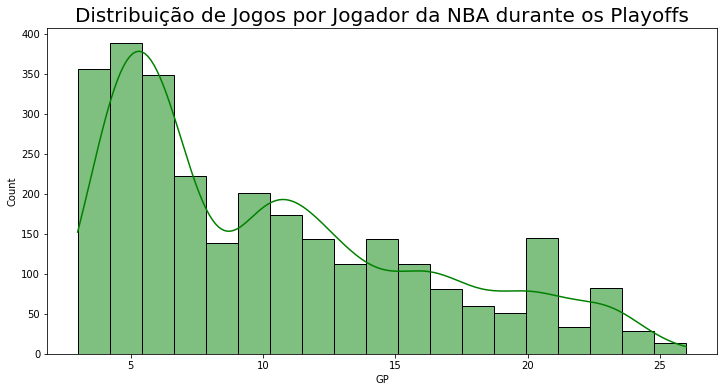

In [135]:
#distribuição dos jogos por jogador
plt.figure(figsize=(12,6))
sns.histplot(x=nba[nba['Stage'] =='Playoffs' ]['GP'], kde=True, color='g')
plt.title('Distribuição de Jogos por Jogador da NBA durante os Playoffs', fontsize=20)
ax.set_xlabel('Games Played', fontsize=16)
plt.show()

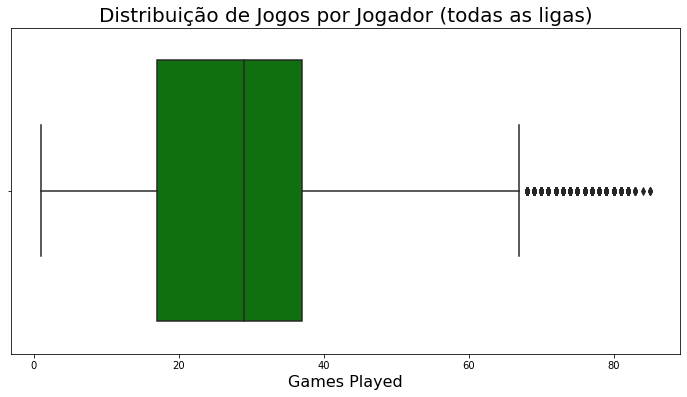

In [98]:
#distribuição dos jogos por jogador
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=dados['GP'], color='g')
ax.set_title('Distribuição de Jogos por Jogador (todas as ligas)', fontsize=20)
ax.set_xlabel('Games Played', fontsize=16)
plt.show()

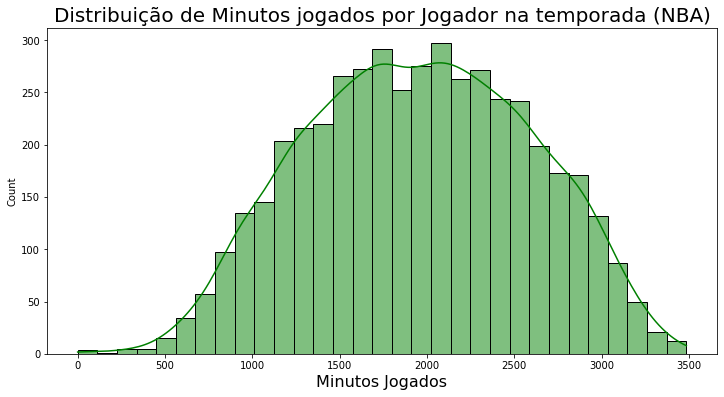

In [136]:
#distribuição dos minutos jogados na temporada por jogador
plt.figure(figsize=(12,6))
ax = sns.histplot(x=nba[nba['Stage'] == 'Regular_Season']['MIN'], kde=True, color='g')
ax.set_title('Distribuição de Minutos jogados por Jogador na temporada (NBA)', fontsize=20)
ax.set_xlabel('Minutos Jogados', fontsize=16)
plt.show()

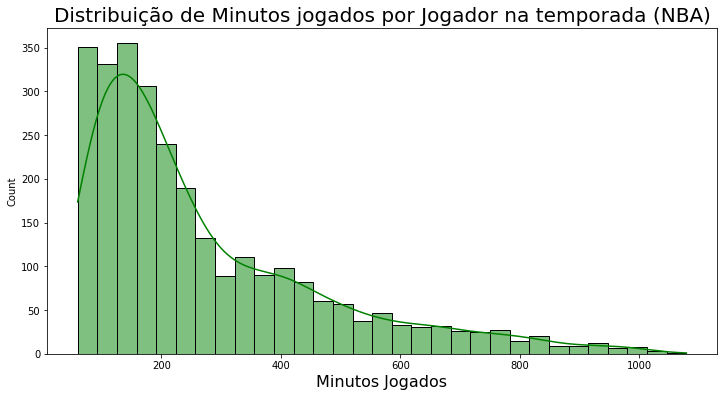

In [137]:
#distribuição dos minutos jogados na temporada por jogador
plt.figure(figsize=(12,6))
ax = sns.histplot(x=nba[nba['Stage'] == 'Playoffs']['MIN'], kde=True, color='g')
ax.set_title('Distribuição de Minutos jogados por Jogador na temporada (NBA)', fontsize=20)
ax.set_xlabel('Minutos Jogados', fontsize=16)
plt.show()

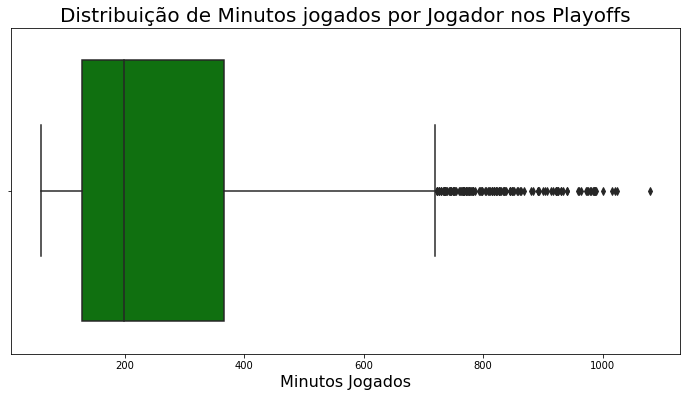

In [138]:
#distribuição dos minutos jogados na temporada por jogador
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=nba[nba['Stage']=='Playoffs']['MIN'], color='g')
ax.set_title('Distribuição de Minutos jogados por Jogador nos Playoffs', fontsize=20)
ax.set_xlabel('Minutos Jogados', fontsize=16)
plt.show()

In [109]:
#estatísticas descritivas
nba[['3PM', '3PA', 'FTM', 'FTA']].describe()

,3PM,3PA,FTM,FTA
count,7490.000000,7490.000000,7490.000000,7490.000000
mean,40.623498,112.549666,103.739386,135.812817
std,52.363572,138.022068,112.961595,143.414609
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,19.000000,26.000000
50%,14.000000,42.000000,67.000000,90.000000
75%,69.000000,197.000000,148.000000,197.000000
max,402.000000,1028.000000,756.000000,972.000000


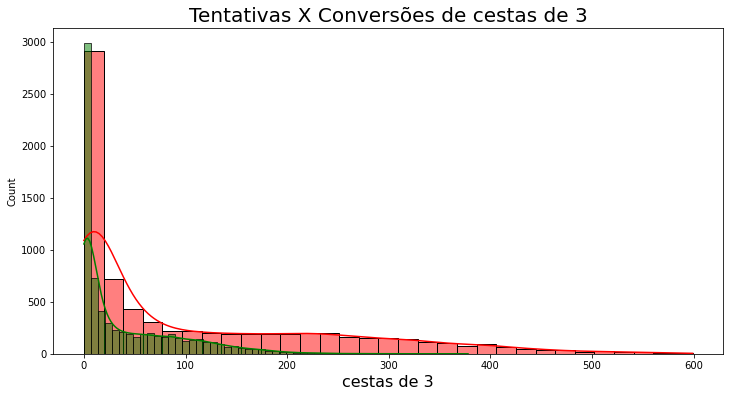

In [110]:
plt.figure(figsize=(12,6))
sns.histplot(x=nba[nba['3PA']< 600]['3PA'], kde=True, color='r')
sns.histplot(x=nba[nba['3PM']< 400]['3PM'], kde=True, color='g')
plt.title('Tentativas X Conversões de cestas de 3', fontsize=20)
plt.xlabel('cestas de 3', fontsize=16)
plt.show()

In [111]:
#ver colunas
nba.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school', 'age_2020', 'season_start', 'season_end',
       'age_season_start'],
      dtype='object')

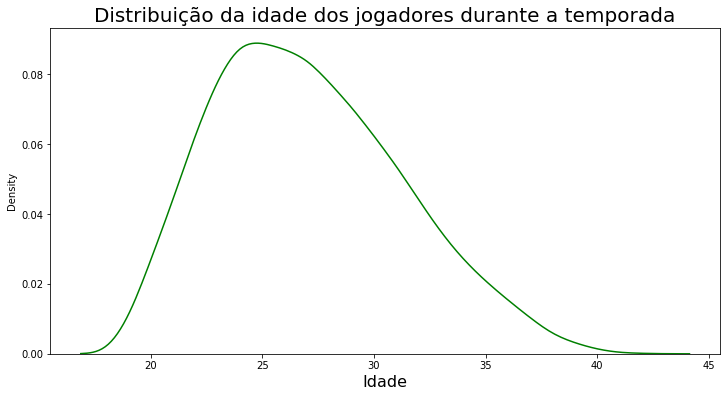

In [112]:
#distribuição dos minutos jogados na temporada por jogador
plt.figure(figsize=(12,6))
ax = sns.kdeplot(x=nba['age_season_start'],color='g')
ax.set_title('Distribuição da idade dos jogadores durante a temporada', fontsize=20)
ax.set_xlabel('Idade', fontsize=16)
plt.show()

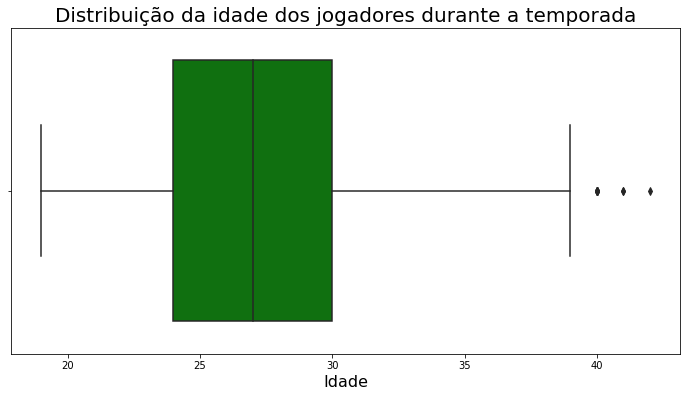

In [115]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=nba['age_season_start'],color='g')
ax.set_title('Distribuição da idade dos jogadores durante a temporada', fontsize=20)
ax.set_xlabel('Idade', fontsize=16)
plt.show()

In [113]:
nba[['age_season_start', 'age_2020']].describe()

,age_season_start,age_2020
count,7490.000000,7490.000000
mean,27.067156,37.788518
std,4.243132,7.647958
min,19.000000,20.000000
25%,24.000000,32.000000
50%,27.000000,38.000000
75%,30.000000,43.000000
max,42.000000,59.000000


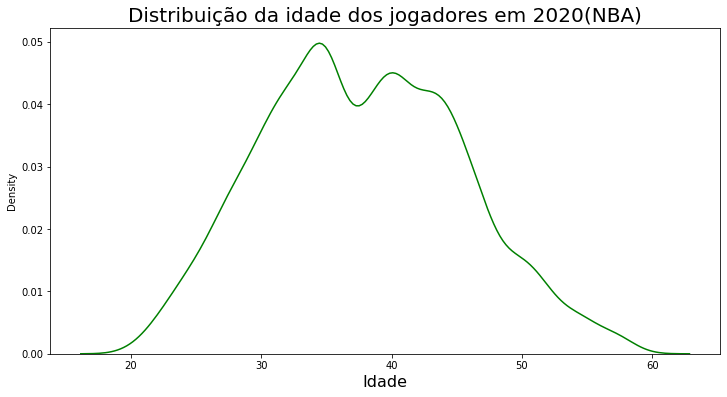

In [114]:
plt.figure(figsize=(12,6))
ax = sns.kdeplot(x=nba['age_2020'],color='g')
ax.set_title('Distribuição da idade dos jogadores em 2020(NBA)', fontsize=20)
ax.set_xlabel('Idade', fontsize=16)
plt.show()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,age_2020,season_start,season_end,age_season_start
0,NBA,2019 - 2020,Regular_Season,James Harden,HOU,68,2482.6,672,1514,299,843,692,800,308,227,70,376,446,512,125,60,2335,1989.0,Aug,"Aug 26, 1989",06-May,196.0,220.0,100.0,United States,Artesia High School,31.0,2019,2020,30.0
1,NBA,2019 - 2020,Regular_Season,Damian Lillard,POR,66,2473.7,624,1349,270,674,460,518,194,114,33,251,284,530,70,22,1978,1990.0,Jul,"Jul 15, 1990",06-Mar,191.0,195.0,88.0,United States,Oakland High School,30.0,2019,2020,29.0
2,NBA,2019 - 2020,Regular_Season,Devin Booker,PHX,70,2511.8,627,1283,141,398,468,509,264,213,29,268,297,456,49,18,1863,1996.0,Oct,"Oct 30, 1996",06-Jun,198.0,206.0,93.0,United States,Moss Point High School,24.0,2019,2020,23.0
3,NBA,2019 - 2020,Regular_Season,Giannis Antetokounmpo,MIL,63,1916.9,685,1238,89,293,398,629,230,195,140,716,856,354,61,66,1857,1994.0,Dec,"Dec 6, 1994",06-Nov,211.0,242.0,110.0,Greece / Nigeria,NaN,26.0,2019,2020,25.0
4,NBA,2019 - 2020,Regular_Season,Trae Young,ATL,60,2120.1,546,1249,205,568,481,559,289,104,32,223,255,560,65,8,1778,1998.0,Sep,"Sep 19, 1998",06-Feb,188.0,180.0,82.0,United States,Norman High School,22.0,2019,2020,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53793,NBA,1999 - 2000,Playoffs,John Salley,LAL,18,78.0,5,13,0,0,7,10,4,16,9,13,22,4,1,6,17,1964.0,May,"May 16, 1964",06-Nov,211.0,230.0,104.0,United States,Canarsie High School,56.0,1999,2000,35.0
53794,NBA,1999 - 2000,Playoffs,Muggsy Bogues,TOR,3,87.0,6,21,3,9,1,3,4,4,3,3,6,5,4,0,16,1965.0,Jan,"Jan 9, 1965",05-Mar,160.0,136.0,62.0,United States,Dunbar High School,55.0,1999,2000,34.0
53795,NBA,1999 - 2000,Playoffs,Jerome Williams,DET,3,73.0,7,14,0,0,1,8,3,8,7,14,21,2,3,0,15,1973.0,May,"May 10, 1973",06-Sep,206.0,206.0,93.0,United States,Magruder High School,47.0,1999,2000,26.0
53796,NBA,1999 - 2000,Playoffs,Randy Livingston,PHX,7,63.0,6,27,2,6,0,0,4,6,2,5,7,4,4,1,14,1975.0,Apr,"Apr 2, 1975",06-Apr,193.0,209.0,95.0,United States,Isidore Newman School,45.0,1999,2000,24.0


In [116]:
nba.loc[nba['age_season_start'] == nba['age_season_start'].max() ]

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,age_2020,season_start,season_end,age_season_start
250,NBA,2019 - 2020,Regular_Season,Vince Carter,ATL,60,875.5,107,304,61,202,23,29,33,90,18,106,124,48,23,25,298,1977.0,Jan,"Jan 26, 1977",06-Jun,198.0,220.0,100.0,United States,Mainland High School,43.0,2019,2020,42.0


In [117]:
data = nba[nba['season_start'] == 2019]

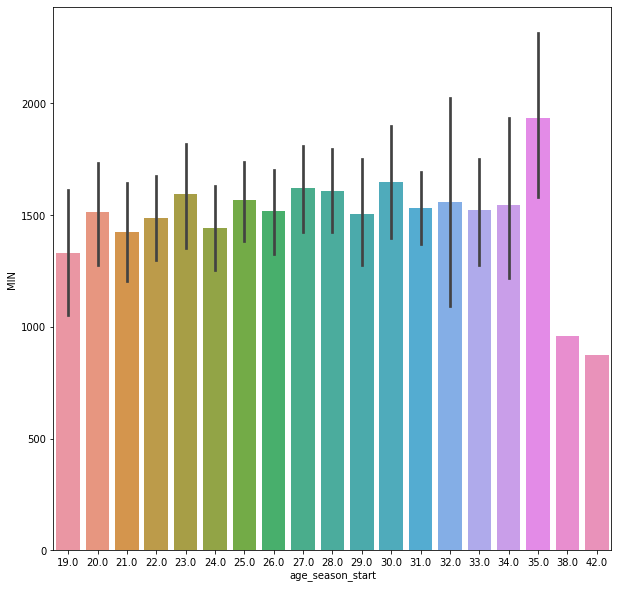

In [123]:
#scatterplot de idade X minutos jogados na última temporada
plt.figure(figsize=(10,10))
ax = sns.barplot(x='age_season_start', y='MIN', data=data)

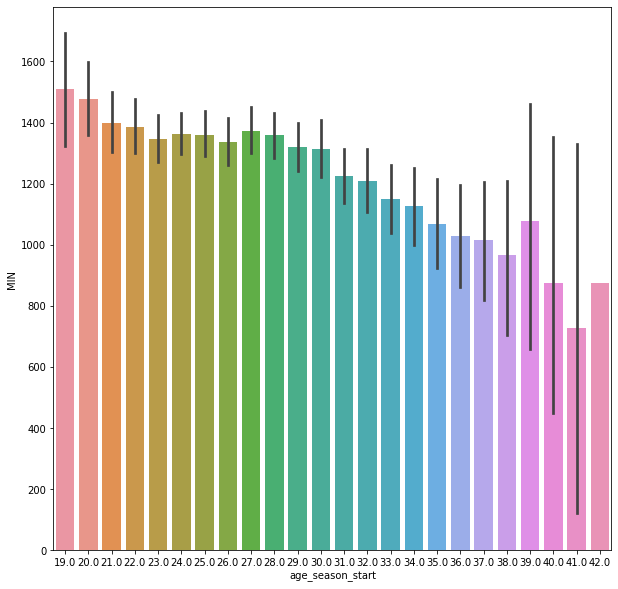

In [125]:
#scatterplot de idade X minutos jogados na última temporada
plt.figure(figsize=(10,10))
ax = sns.barplot(x='age_season_start', y='MIN', data=nba)

In [126]:
#criar uma coluna com a idade por faixa etária
nba['faixa_etaria'] = pd.cut(x=nba['age_season_start'], include_lowest=True, bins=[0,20,25,30,35], labels=['Até 20', '20-25','26-30','Mais de 35'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:
nba.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,age_2020,season_start,season_end,age_season_start,faixa_etaria
0,NBA,2019 - 2020,Regular_Season,James Harden,HOU,68,2482.6,672,1514,299,843,692,800,308,227,70,376,446,512,125,60,2335,1989.0,Aug,"Aug 26, 1989",06-May,196.0,220.0,100.0,United States,Artesia High School,31.0,2019,2020,30.0,26-30
1,NBA,2019 - 2020,Regular_Season,Damian Lillard,POR,66,2473.7,624,1349,270,674,460,518,194,114,33,251,284,530,70,22,1978,1990.0,Jul,"Jul 15, 1990",06-Mar,191.0,195.0,88.0,United States,Oakland High School,30.0,2019,2020,29.0,26-30
2,NBA,2019 - 2020,Regular_Season,Devin Booker,PHX,70,2511.8,627,1283,141,398,468,509,264,213,29,268,297,456,49,18,1863,1996.0,Oct,"Oct 30, 1996",06-Jun,198.0,206.0,93.0,United States,Moss Point High School,24.0,2019,2020,23.0,20-25
3,NBA,2019 - 2020,Regular_Season,Giannis Antetokounmpo,MIL,63,1916.9,685,1238,89,293,398,629,230,195,140,716,856,354,61,66,1857,1994.0,Dec,"Dec 6, 1994",06-Nov,211.0,242.0,110.0,Greece / Nigeria,NaN,26.0,2019,2020,25.0,20-25
4,NBA,2019 - 2020,Regular_Season,Trae Young,ATL,60,2120.1,546,1249,205,568,481,559,289,104,32,223,255,560,65,8,1778,1998.0,Sep,"Sep 19, 1998",06-Feb,188.0,180.0,82.0,United States,Norman High School,22.0,2019,2020,21.0,20-25


In [133]:
nba['Stage'].unique()

array(['Regular_Season', 'Playoffs'], dtype=object)

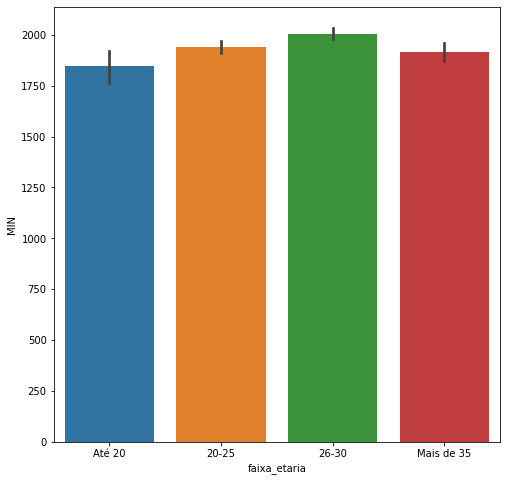

In [139]:
#scatterplot de idade X minutos jogados na última temporada
plt.figure(figsize=(8,8))
ax = sns.barplot(x='faixa_etaria', y='MIN', data=nba[nba['Stage'] == 'Regular_Season'])

In [140]:
nba_regular = nba[nba['Stage'] == 'Regular_Season']
nba_playoffs = nba[nba['Stage'] == 'Playoffs']

In [141]:
#vendo quantas observações de cada dataset eu fiquei
nba_regular.shape, nba_playoffs.shape

((4655, 36), (2835, 36))

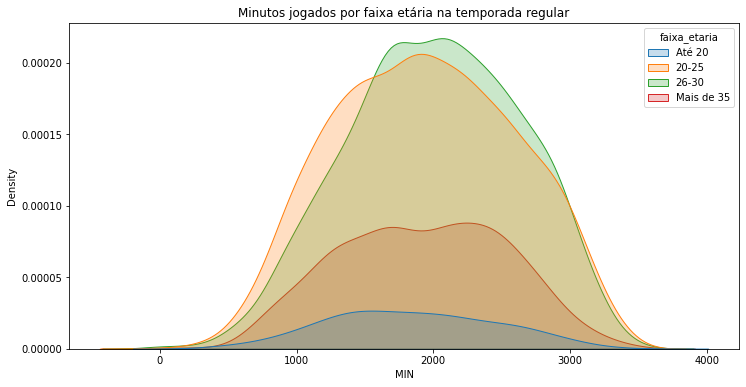

In [142]:
#distribuição de minutos jogados por faixa etária
plt.figure(figsize=(12,6))
sns.kdeplot(data=nba_regular, x='MIN', hue='faixa_etaria', legend=True, fill=True)
plt.title('Minutos jogados por faixa etária na temporada regular');

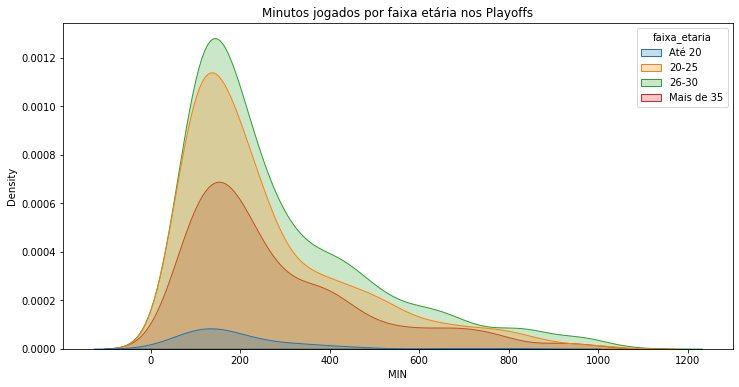

In [143]:
#distribuição de minutos jogados por faixa etária
plt.figure(figsize=(12,6))
sns.kdeplot(data=nba_playoffs, x='MIN', hue='faixa_etaria', legend=True, fill=True)
plt.title('Minutos jogados por faixa etária nos Playoffs');

In [144]:
#vendo a correlação entre idade e minutos jogados em números na temporada regular
corr = nba_regular[['age_season_start', 'MIN', 'season_start']].corr()
corr

,age_season_start,MIN,season_start
age_season_start,1.000000,-0.005039,-0.073740
MIN,-0.005039,1.000000,-0.236623
season_start,-0.073740,-0.236623,1.000000


In [146]:
#vendo a correlação entre idade e minutos jogados em números nos playoffs
corr = nba_playoffs[['age_season_start', 'MIN', 'season_start']].corr()
corr

,age_season_start,MIN,season_start
age_season_start,1.000000,0.024596,-0.067933
MIN,0.024596,1.000000,-0.022985
season_start,-0.067933,-0.022985,1.000000


In [147]:
colunas

{'3PA': 'bolas_de_3_tentadas',
 '3PM': 'bolas_de_3_convertidas',
 'AST': 'assistencias',
 'BLK': 'bloqueios',
 'DRB': 'rebotes_defensivos',
 'FGA': 'arremessos_tentados',
 'FGM': 'arremessos_convertidos',
 'FTA': 'lance_livre_tentados',
 'FTM': 'lance_livre_convertido',
 'GP': 'numero_jogos',
 'MIN': 'minutos_jogados',
 'ORB': 'rebotes_ofensivos',
 'PF': 'faltas',
 'PTS': 'pontos',
 'REB': 'total_rebotes',
 'STL': 'roubos_de_bola',
 'TOV': 'turnover'}

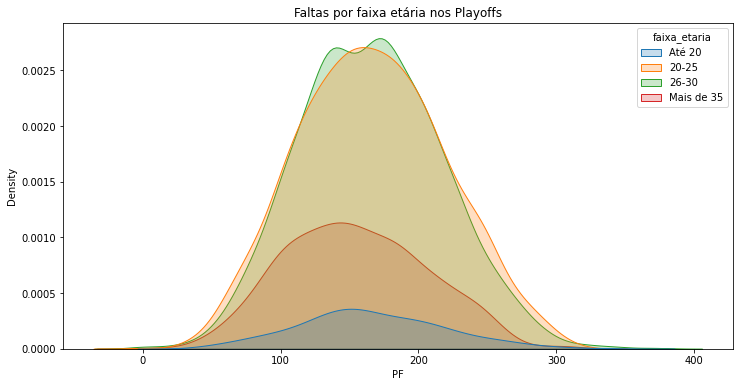

In [149]:
#distribuição de minutos jogados por faixa etária
plt.subplot(1,2)
plt.figure(figsize=(12,6))
sns.kdeplot(data=nba_regular, x='PF', hue='faixa_etaria', legend=True, fill=True)
plt.title('Faltas por faixa etária na Temporada Regular');

In [182]:
ultimas_5_temporadas = nba.query('season_start >= 2015')

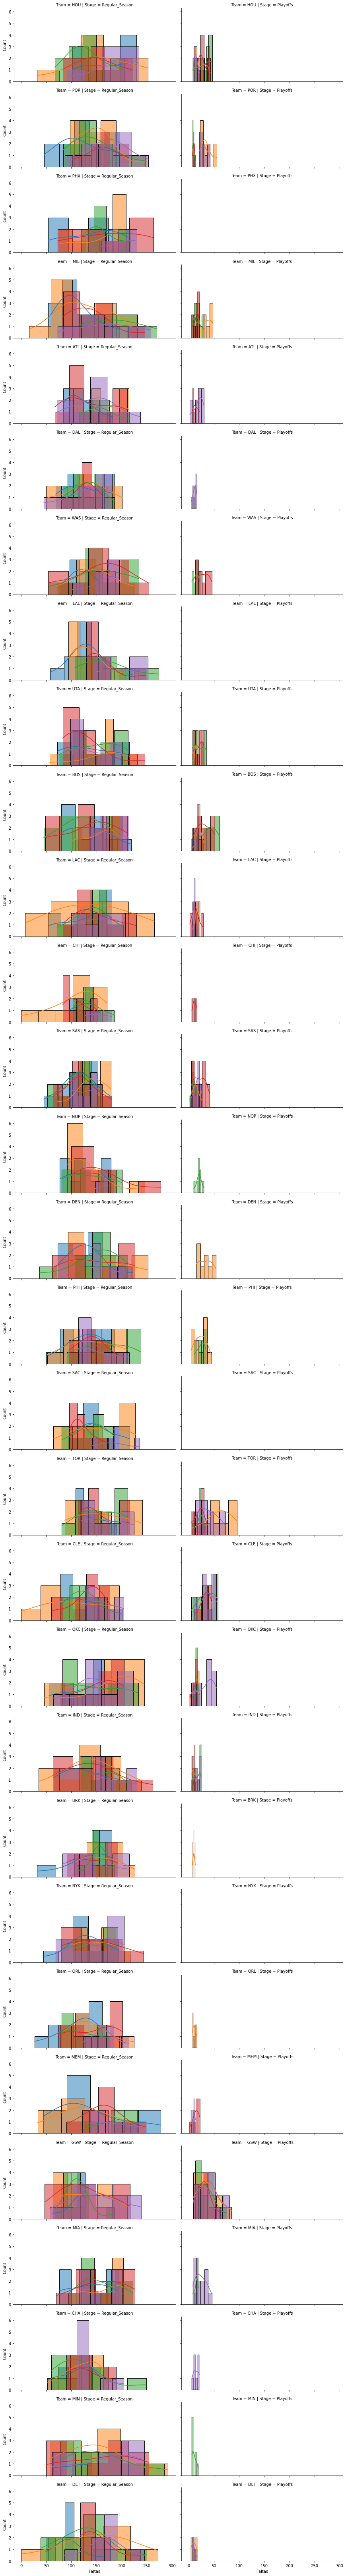

In [191]:
g = sns.FacetGrid(ultimas_5_temporadas, col="Stage", row="Team",hue='Season', aspect=2) #col="Stage",
g.map_dataframe(sns.histplot, x="PF", kde=True)
g.set_axis_labels("Faltas", "Count");


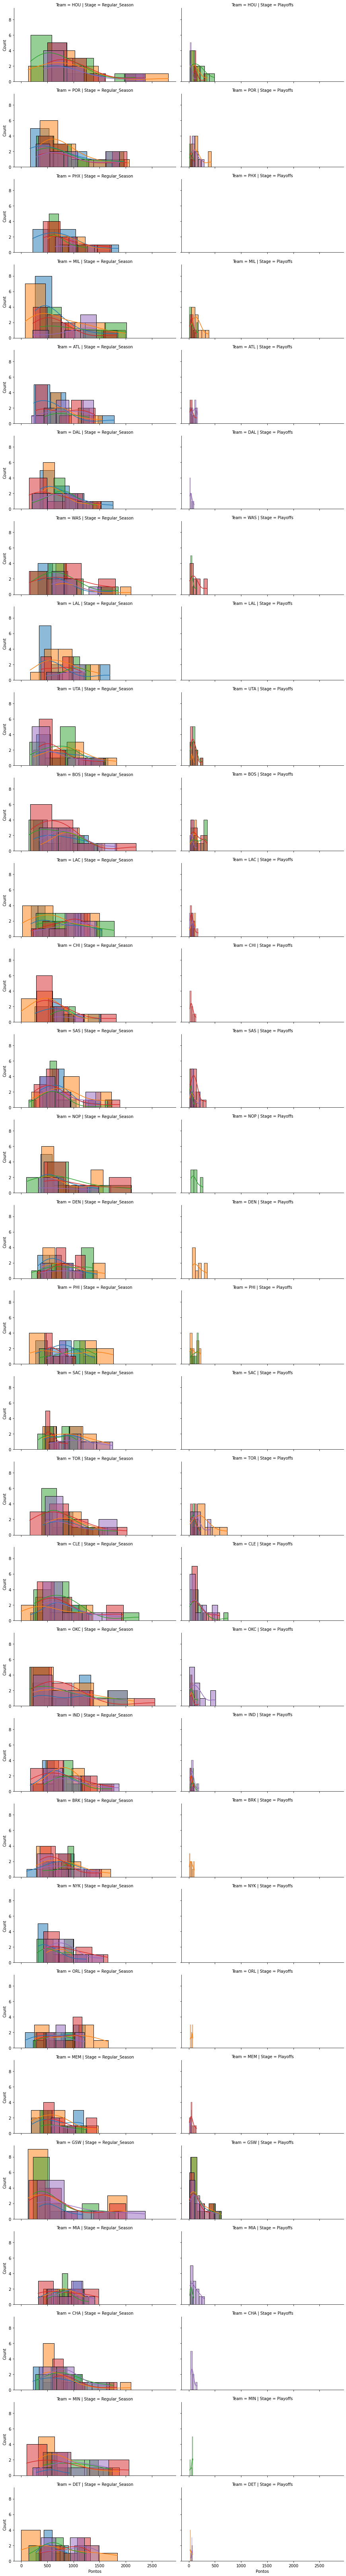

In [194]:
g = sns.FacetGrid(ultimas_5_temporadas, col="Stage", row="Team",hue='Season', aspect=2) #col="Stage",
g.map_dataframe(sns.histplot, x="PTS", kde=True, legend=True );
g.set_axis_labels("Pontos", "Count");


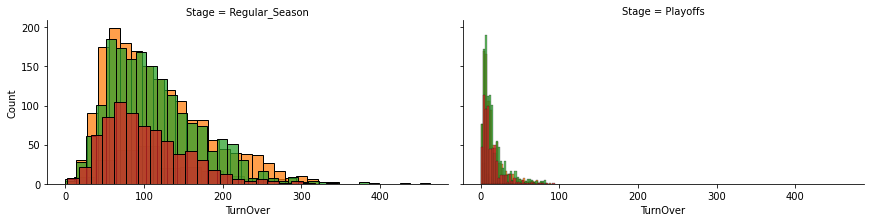

In [192]:
g = sns.FacetGrid(nba, col="Stage", hue="faixa_etaria",aspect=2) #col="Stage",
g.map_dataframe(sns.histplot, x="TOV")
g.set_axis_labels("TurnOver", "Count");

In [169]:
nba.Team.unique()

array(['HOU', 'POR', 'PHX', 'MIL', 'ATL', 'DAL', 'WAS', 'LAL', 'UTA',
       'BOS', 'LAC', 'CHI', 'SAS', 'NOP', 'DEN', 'PHI', 'SAC', 'TOR',
       'CLE', 'OKC', 'IND', 'BRK', 'NYK', 'ORL', 'MEM', 'GSW', 'MIA',
       'CHA', 'MIN', 'DET', 'NJN', 'SEA', 'VAN'], dtype=object)